<a href="https://colab.research.google.com/github/jadonalam/test/blob/main/Copy_of_H_R_Diagram_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hertzsprung-Russel Diagram Exploration
This coding activity let's us explore a dataset of stars by plotting something called an H-R Diagram. Astronomers use the Hertzsprung-Russell Diagram to compare groups of stars and to look for patterns.

If you need a refresher on the HR diagram, take a look [here](https://openstax.org/books/astronomy/pages/18-4-the-h-r-diagram#OSC_Astro_18_04_Sample)

## Question 1
**Put your name and period and include anyone working with you as well.**



```
# This is formatted as code
```

Double click here to answer:

# Star catalogue analysis
This activity analyzes properties of over 100,000 stars.

To get started,
- You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Coding activity](https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/Colab_Coding_Intro.ipynb) and come back here.

When you're ready, run each code cell until you get down to **Question 2**.

In [ ]:
# Import modules that contain functions we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import SymmetricalLogLocator, LogFormatterSciNotation


In [ ]:
# Read in data that will be used for the calculations.
data = pd.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/stars.csv")

In [ ]:
data.temp

0         5756.588113
1         3383.441193
2         5567.728737
3         4996.415833
4         3691.168543
             ...     
119609            NaN
119610            NaN
119611            NaN
119612            NaN
119613            NaN
Name: temp, Length: 119614, dtype: float64

In [ ]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(119614, 16)

## Question 2
Let's get acquainted with this data set. Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent?
- How many stars are included in this data set?

Double click here to answer:


When you're ready, scroll down to **Question 3**.

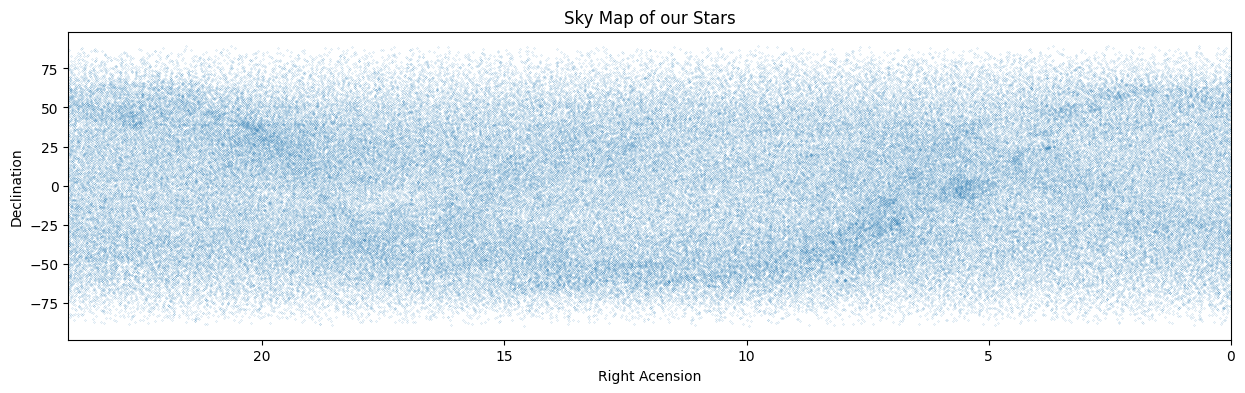

In [ ]:
fig = plt.figure(figsize=(15, 4))
plt.scatter(data['ra'],data['dec'], s=0.01)
plt.xlim(24, 0)
plt.title("Sky Map of our Stars")
plt.xlabel("Right Acension")
plt.ylabel("Declination");

## Question 3
The code above generates a plot of **declination** vs. **right ascension** for each star in the data table.
- The title and axis labels on the plot could use some work. Try editing the code above the plot, then run the code again to see the changes.
- What pattern do you see in the plot? What might explain that pattern?

Double click here to describe patterns in the plot:


When you're ready, scroll down to **Question 4**.

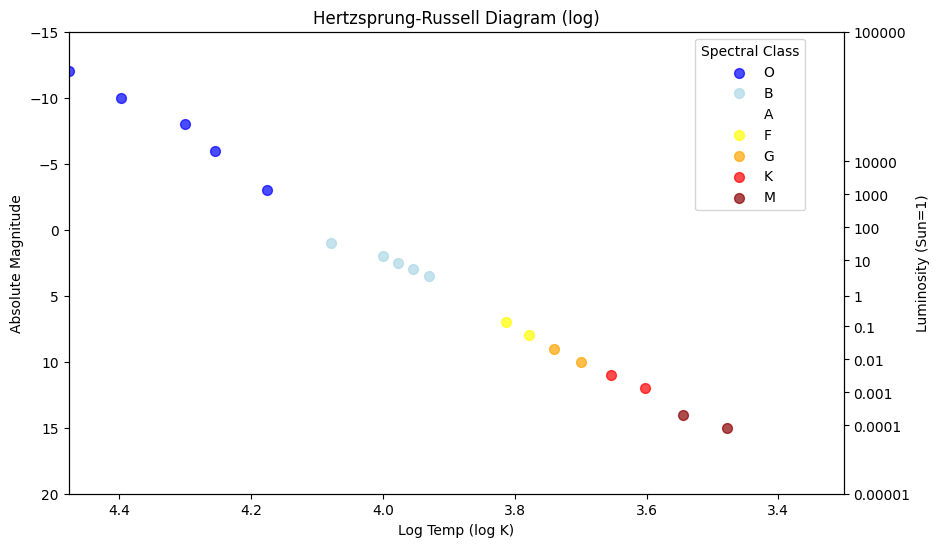

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Expanded sample data with additional points
data = {
    'temp': np.array([3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 12000, 15000, 18000, 20000, 25000, 30000]),
    'absmag': np.array([15, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1, -3, -6, -8, -10, -12]),
    'spectral_class': np.array(['M', 'M', 'K', 'K', 'G', 'G', 'F', 'F', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'O', 'O', 'O', 'O', 'O'])
}

# Spectral class color mapping
spectral_colors = {
    'O': 'blue',
    'B': 'lightblue',
    'A': 'white',
    'F': 'yellow',
    'G': 'orange',
    'K': 'red',
    'M': 'darkred'
}

def magnitude_to_luminosity(magnitude):
    return 10 ** ((4.83 - magnitude) / 2.5)

# Plotting
plt.figure(figsize=(10, 6))
for spectral_class in spectral_colors:
    mask = data['spectral_class'] == spectral_class
    plt.scatter(np.log10(data['temp'][mask]), data['absmag'][mask], s=50,
                color=spectral_colors[spectral_class], label=spectral_class, alpha=0.7)

plt.xlim(np.log10(30000), np.log10(2000))
plt.ylim(20, -15)
plt.title("Hertzsprung-Russell Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log Temp (log K)")
plt.legend(title='Spectral Class', bbox_to_anchor=(.80, 1), loc='upper left')

# Create secondary y-axis for luminosity
ax2 = plt.gca().twinx()
ax2.set_ylabel('Luminosity (Sun=1)')
ax2.set_yscale('log')
lum_upper_limit = magnitude_to_luminosity(-15)
lum_lower_limit = magnitude_to_luminosity(20)
lum_center = magnitude_to_luminosity(5)  # Corresponding to absolute magnitude of 5
ax2.set_ylim(lum_lower_limit, lum_upper_limit)
ax2.set_yticks([lum_lower_limit, 0.0001, 0.001, 0.01, 0.1, lum_center, 10, 100, 1000, 10000, lum_upper_limit])
ax2.set_yticklabels(['0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000'])

plt.show()


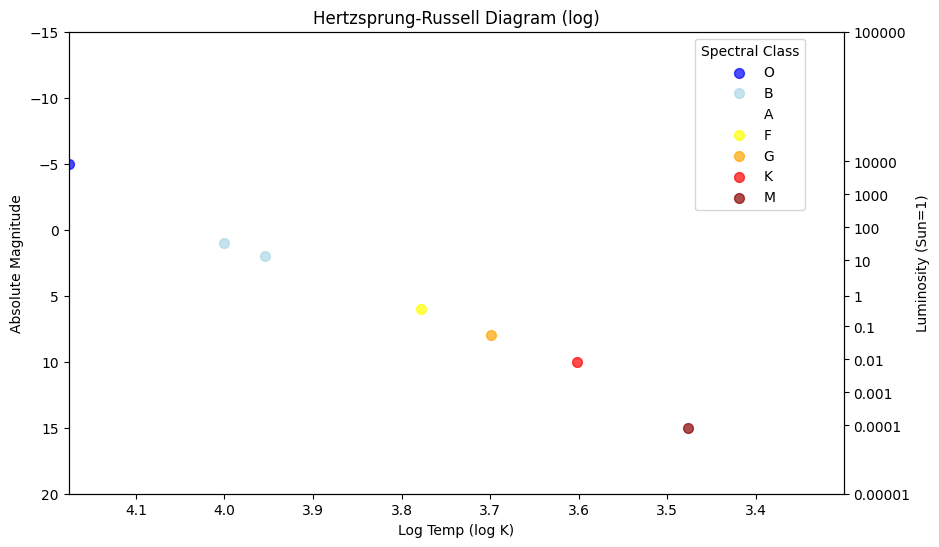

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with an additional 'spectral_class' column
data = {
    'temp': np.array([3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000]),
    'absmag': np.array([15, 10, 8, 6, 4, 3, 2, 1, -5, -10]),
    'spectral_class': np.array(['M', 'K', 'G', 'F', 'A', 'A', 'B', 'B', 'O', 'O'])
}

# Spectral class color mapping
spectral_colors = {
    'O': 'blue',
    'B': 'lightblue',
    'A': 'white',
    'F': 'yellow',
    'G': 'orange',
    'K': 'red',
    'M': 'darkred'
}
def magnitude_to_luminosity(magnitude):
    return 10 ** ((4.83 - magnitude) / 2.5)

# Plotting
plt.figure(figsize=(10, 6))
for spectral_class in spectral_colors:
    mask = data['spectral_class'] == spectral_class
    plt.scatter(np.log10(data['temp'][mask]), data['absmag'][mask], s=50,
                color=spectral_colors[spectral_class], label=spectral_class, alpha=0.7)

plt.xlim(np.log10(15000), np.log10(2000))
plt.ylim(20, -15)
plt.title("Hertzsprung-Russell Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log Temp (log K)")
plt.legend(title='Spectral Class', bbox_to_anchor=(.80, 1), loc='upper left')

# Create secondary y-axis for luminosity
ax2 = plt.gca().twinx()
ax2.set_ylabel('Luminosity (Sun=1)')
ax2.set_yscale('log')
lum_upper_limit = magnitude_to_luminosity(-15)
lum_lower_limit = magnitude_to_luminosity(20)
lum_center = magnitude_to_luminosity(5)  # Corresponding to absolute magnitude of 5
ax2.set_ylim(lum_lower_limit, lum_upper_limit)
ax2.set_yticks([lum_lower_limit, 0.0001, 0.001, 0.01, 0.1, lum_center, 10, 100, 1000, 10000, lum_upper_limit])
ax2.set_yticklabels(['0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000'])

plt.show()


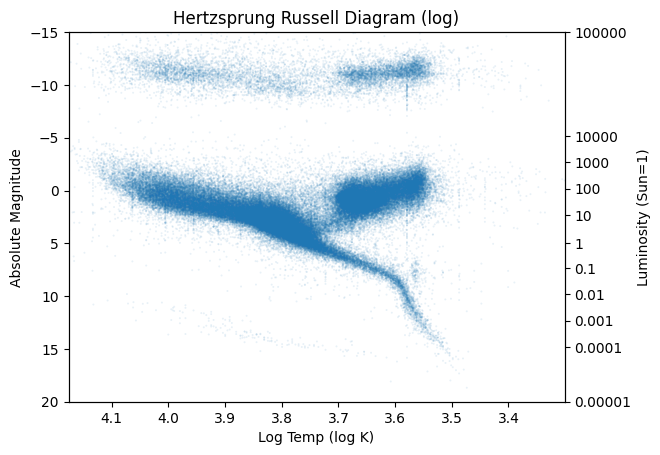

In [ ]:
def magnitude_to_luminosity(magnitude):
    return 10 ** ((4.83 - magnitude) / 2.5)

# format the points on the plot
transparency = 0.1
size = 2

# draws a scatter plot
plt.scatter(np.log10(data.temp), data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Hertzsprung Russell Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log Temp (log K)")

ax2 = plt.gca().twinx()
ax2.set_ylabel('Luminosity (Sun=1)')

# Set the luminosity axis range and ticks
ax2.set_yscale('log')
lum_upper_limit = magnitude_to_luminosity(-15)
lum_lower_limit = magnitude_to_luminosity(20)
lum_center = magnitude_to_luminosity(5)  # Corresponding to absolute magnitude of 5
ax2.set_ylim(lum_lower_limit, lum_upper_limit)
ax2.set_yticks([lum_lower_limit, 0.0001, 0.001, 0.01, 0.1, lum_center, 10, 100, 1000, 10000, lum_upper_limit])
ax2.set_yticklabels(['0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000'])

plt.show()

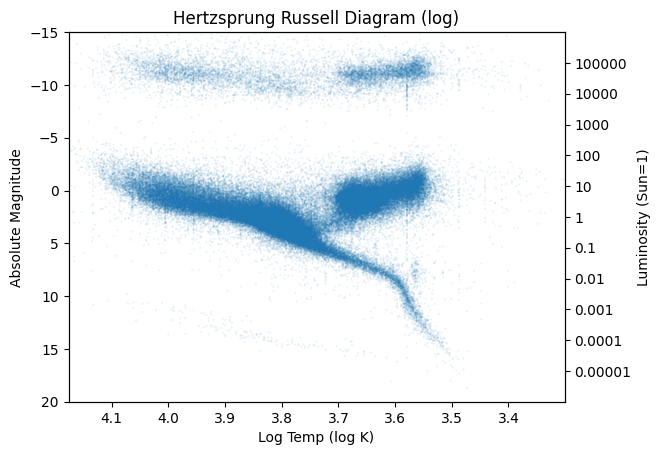

In [ ]:
# format the points on the plot
transparency = 0.1
size = 2

# draws a scatter plot
plt.scatter(np.log10(data.temp), data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Hertzsprung Russell Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log Temp (log K)")

ax2 = plt.gca().twinx()
ax2.set_ylabel('Luminosity (Sun=1)')

ax2.set_yscale('log')
ax2.set_ylim(0.000001, 1000000)
ax2.set_yticks([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000])
ax2.set_yticklabels(['0.00001', '0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', '100000'])

plt.show()

Text(0.5, 0, 'Log Temp (log K)')

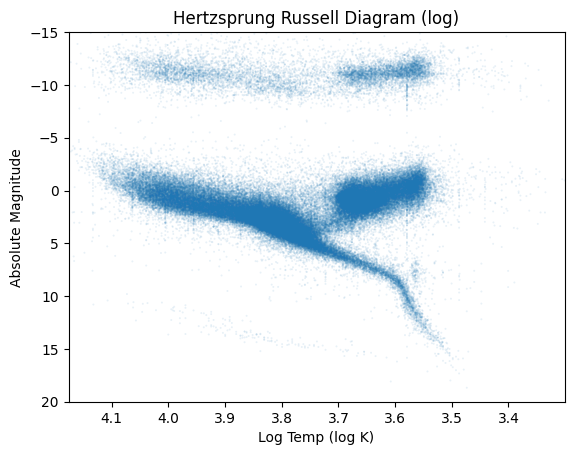

In [ ]:
# format the points on the plot
transparency = 0.1
size = 2

# draws a scatter plot
plt.scatter(np.log10(data.temp), data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Hertzsprung Russell Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log Temp (log K)")

## Question 4
Use the plot above to answer the following questions:
- What patterns do you see in the plot?
- The y-axis shows brighter stars at the top and dimmer stars toward the bottom. What's strange about the **absolute magnitude** scale?
- Some stars aren't very hot, but they're very bright because they're so big (called *giants* and *super giants*). Where are those on the plot?
- Other stars are really bright, even though they're small (called *white dwarfs*). How could that happen? Where might you find them on the plot?

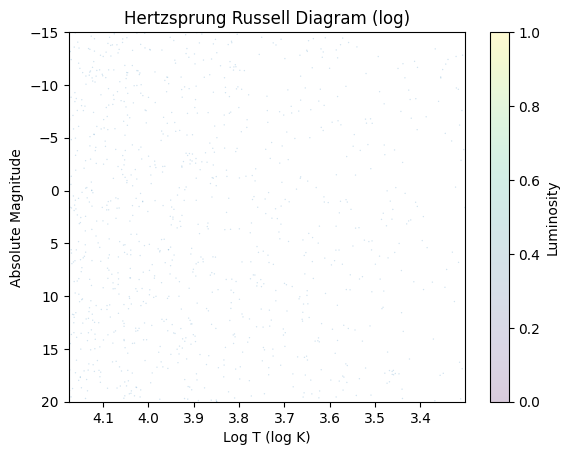

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'temp': np.random.randint(2000, 15000, 1000),
    'absmag': np.random.uniform(-15, 20, 1000),
    'luminosity': np.random.uniform(0, 1, 1000)  # Assume luminosity values between 0 and 1
}

# Format the points on the plot
transparency = 0.2
size = 1
colors = data['luminosity']  # Use luminosity values for colors

# Draws a scatter plot
plt.scatter(np.log10(data['temp']), data['absmag'], s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000), np.log10(2000))
plt.ylim(20, -15)
plt.title("Hertzsprung Russell Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log T (log K)")
# Add a colorbar to indicate luminosity
plt.colorbar(label='Luminosity')
plt.show()


Double click to answer:

When you're ready, scroll down to **Question 5**.

In [ ]:
# These are the abbreviations for all the constellations
data['con'].sort_values().unique()

array(['And', 'Ant', 'Aps', 'Aql', 'Aqr', 'Ara', 'Ari', 'Aur', 'Boo',
       'CMa', 'CMi', 'CVn', 'Cae', 'Cam', 'Cap', 'Car', 'Cas', 'Cen',
       'Cep', 'Cet', 'Cha', 'Cir', 'Cnc', 'Col', 'Com', 'CrA', 'CrB',
       'Crt', 'Cru', 'Crv', 'Cyg', 'Del', 'Dor', 'Dra', 'Equ', 'Eri',
       'For', 'Gem', 'Gru', 'Her', 'Hor', 'Hya', 'Hyi', 'Ind', 'LMi',
       'Lac', 'Leo', 'Lep', 'Lib', 'Lup', 'Lyn', 'Lyr', 'Men', 'Mic',
       'Mon', 'Mus', 'Nor', 'Oct', 'Oph', 'Ori', 'Pav', 'Peg', 'Per',
       'Phe', 'Pic', 'PsA', 'Psc', 'Pup', 'Pyx', 'Ret', 'Scl', 'Sco',
       'Sct', 'Ser', 'Sex', 'Sge', 'Sgr', 'Tau', 'Tel', 'TrA', 'Tri',
       'Tuc', 'UMa', 'UMi', 'Vel', 'Vir', 'Vol', 'Vul', nan], dtype=object)

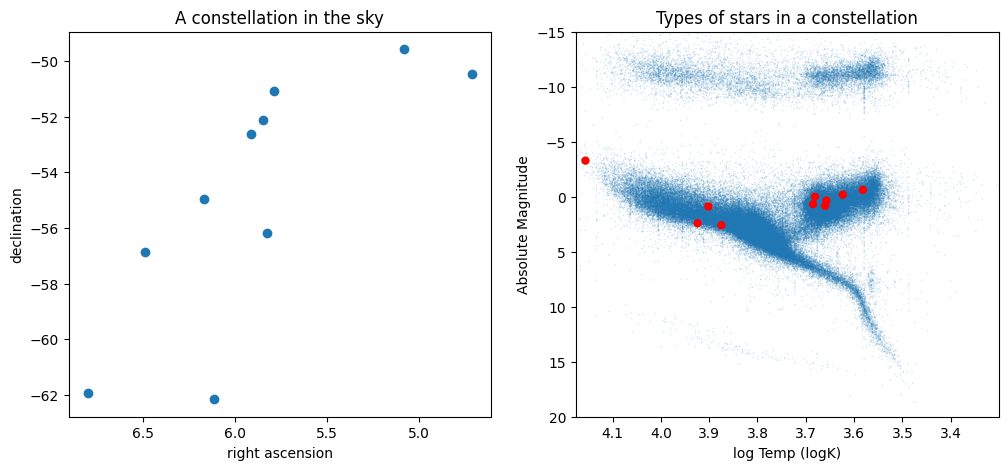

In [ ]:
# This picks a constellation to plot
constellation = data.query('con == "Pic"') # Ori is short for Orion

plt.close('all')
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# This plots where the constellation's 10 brightest stars are in the sky
constellation = constellation.sort_values('mag').head(10)
plt.scatter(constellation['ra'],constellation['dec'])
plt.gca().invert_xaxis()
plt.title("A constellation in the sky")
plt.xlabel("right ascension")
plt.ylabel("declination")

plt.subplot(1, 2, 2)
# format the points on the plot
transparency = 0.2
size = 1

# plots the constellation's stars in red over the big plot of all stars
plt.scatter(np.log10(data['temp']), data['absmag'], s=size, edgecolors='none', alpha=transparency)
logtemps = np.log10(constellation['temp'])
#plt.scatter(constellation['temp'], constellation['absmag'], color='red', edgecolors='none')
plt.scatter(logtemps, constellation['absmag'], color='red', edgecolors='none')
#plt.xlim(2000,15000)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("log Temp (logK)")
plt.show()

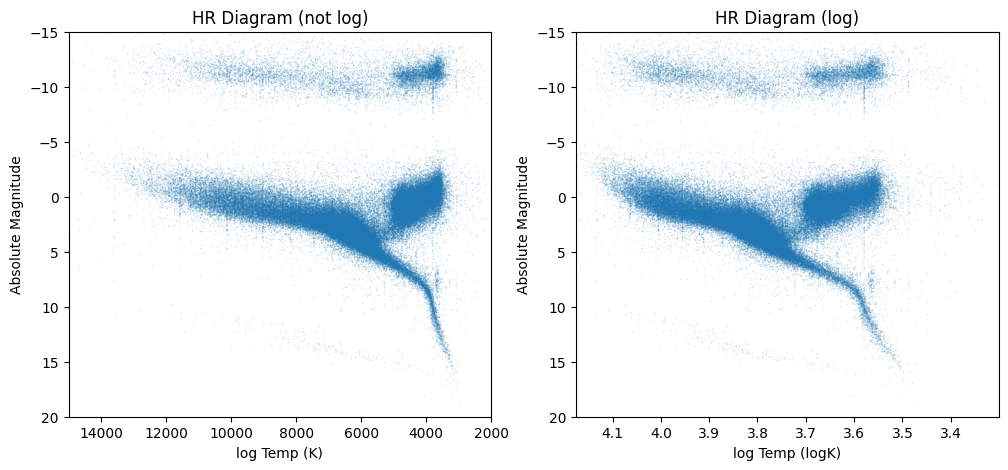

In [ ]:
plt.close('all')
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(data['temp'], data['absmag'], s=size, edgecolors='none', alpha=transparency)
plt.xlim(15000,2000)
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("log Temp (K)")
plt.title("HR Diagram (not log)")

plt.subplot(1, 2, 2)
transparency = 0.2
size = 1

plt.scatter(np.log10(data['temp']), data['absmag'], s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("HR Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("log Temp (logK)")
plt.show()

## Question Five
The left plot above shows what the constellation **Orion** looks like in the sky. The plot on the right shows those same stars (as red points) on the same absolute magnitude vs. temperature plot in part two.
- Using the graphic below, which types of stars are in Orion?
- The code above shows the abbreviation for each constellation, then lets you filter the data set for just the stars in that constellation (called a *query*). Try plotting a different constellation, like Cassiopeia. Is it made of different types of stars?
<img src="https://openstax.org/apps/archive/20231218.154301/resources/dd3b626194347b820b300c0437928fdb31869efd" width="640" /><br />Figure 1 - H-R diagram for a selected sample of stars. (Fraknoi et al., 2017)



---
## Saving Your Work
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)
- File > Print to ... um ... print.
- To save an image of a plot or chart, right-click on it and select Save Image as ...

## Credits
The data came from [The Astronomy Nexus](http://www.astronexus.com/hyg) and their collection of the Hipparcos, Yale Bright Star, and Gliese catalogues ([huge zip file here](http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz)).

UCF physics undergraduate Tyler Townsend, who located the data and began the analysis, was funded by Seminole County Schools to make scientific computing a standard part of every middle school science class. The Mily Way scatterplot was added by [Quarknet](https://quarknet.i2u2.org/) Fellow and high school teacher Jeremy Smith, Baltimore, MD. This notebook was designed by [Adam LaMee](https://adamlamee.github.io/), who coordinated its development as the [PhysTEC](https://www.phystec.org/) Teacher-in-residence in the [University of Central Florida's Physics department](https://sciences.ucf.edu/physics/). Find more of Adam LaMee's activities at [CODINGinK12.org](http://www.codingink12.org).